# Imports

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
import pandas as pd

# Loading Data

In [2]:
titanic = pd.read_csv('titanic_train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Pre-Processing

In [4]:
del titanic['Name']
del titanic['Pclass']
del titanic['PassengerId']
del titanic['Ticket']
del titanic['Fare']
del titanic['Cabin']

In [5]:
titanic['Sex'] = titanic['Sex'].map({'female':1, 'male':0})
titanic['Embarked'] = titanic['Embarked'].map({'S':0, 'C':1, 'Q':2})
titanic.dropna(inplace = True)
y = titanic['Survived']
del titanic['Survived']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(titanic, y, test_size = 0.2)

# Logistic Regression

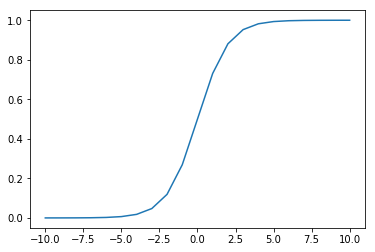

In [7]:
def sigmoid(z):
#     try:
    s = float(1/((1.0 + float((1.0/math.exp(z))))))
#     except OverflowError:
#         s = 1
    return s

def hypothesis(x, m):
    z = 0
    for i in range(len(m)):
        z += m[i]*x[i]
    return sigmoid(z)

def plot_sigmoid(x):
    hx = np.zeros(len(x))
    for i in range(len(x)):
        hx[i] = sigmoid(x[i])
    plt.plot(x, hx)
    plt.show()

plot_sigmoid([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10])

# Gradient Descent

In [8]:
def step_gradient(x, y, theta_current, learning_rate):
    m = len(y)
    feature_numbers = x.shape[1]
    new_theta = np.zeros(feature_numbers)
    for i in range(feature_numbers):
        slope = 0
        for j in range(m):
            slope += (1/m)*x.iloc[j][i]*(hypothesis(x.iloc[j], theta_current) - y.iloc[j])
        new_theta[i] = theta_current[i] - (learning_rate*slope)
    return new_theta

def cost_gd(x, y, theta):
    m = len(y)
    feature_numbers = x.shape[1]
    total_cost = 0
    for j in range(m):
        if(y.iloc[j] == 1):
            total_cost += -1*y.iloc[j]*math.log(hypothesis(x.iloc[j], theta))
        elif(y.iloc[j] == 0):
            total_cost += -1*(1-y.iloc[j])*math.log(1-hypothesis(x.iloc[j], theta))
    return total_cost/m

def gd_runner(x, y, learning_rate, num_iterations):
    m = len(y)
    feature_numbers = x.shape[1]
    theta_current = np.zeros(feature_numbers)
    print("Start Cost", cost_gd(x, y, theta_current))
    for i in range(num_iterations):
        theta_current = step_gradient(x, y, theta_current, learning_rate)
    print("Final Cost", cost_gd(x, y, theta_current))
    return theta_current

def predict(x, theta):
    m = x.shape[0]
    feature_numbers = x.shape[1]
    predictions = np.zeros(m)
    for i in range(m):
        predictions[i] = round(hypothesis(x.iloc[i], theta))
    return predictions

In [9]:
theta = gd_runner(x_train, y_train, 0.001, 20)

Start Cost 0.6931471805599468
Final Cost 0.6690180386791797


In [10]:
predict(x_test, theta)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [11]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
clf.predict(x_test)
clf.coef_[0]

array([ 2.36664189, -0.01335552, -0.23038045, -0.07219815,  0.41855827])

In [12]:
for i in range(x_train.shape[0]):
    print(hypothesis(x_train.iloc[i], clf.coef_[0]))

0.35717590248385234
0.8285420779397766
0.517821156846389
0.3212771033653798
0.8934277766609396
0.3820635644944256
0.4238039782950445
0.34199412061337786
0.870085301827786
0.8539150779965163
0.3480301312299265
0.32273497735298556
0.8974147088671379
0.32228061971958155
0.46363679020690424
0.8682808581567558
0.47226247829228096
0.9216274807701436
0.35030690803476866
0.42054600288087274
0.4075858291452318
0.8895522846442344
0.8078894131164327
0.42706859123939783
0.32346569614467435
0.4467802918989939
0.24613369656350076
0.3480301312299265
0.30335362965312423
0.4238039782950445
0.3883893504410002
0.4238039782950445
0.3695330229028596
0.4303395699949831
0.4303395699949831
0.3525895130520985
0.5735177444802829
0.4303395699949831
0.42706859123939783
0.29826460908201097
0.36333190891630224
0.38522160906294584
0.5648345254276068
0.9221987101820129
0.8814300893349345
0.8819034624954465
0.41405104000772597
0.4368995271612601
0.4108145842214112
0.7942604426487225
0.19521114264717498
0.8315454820383